# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [1]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [2]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [3]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

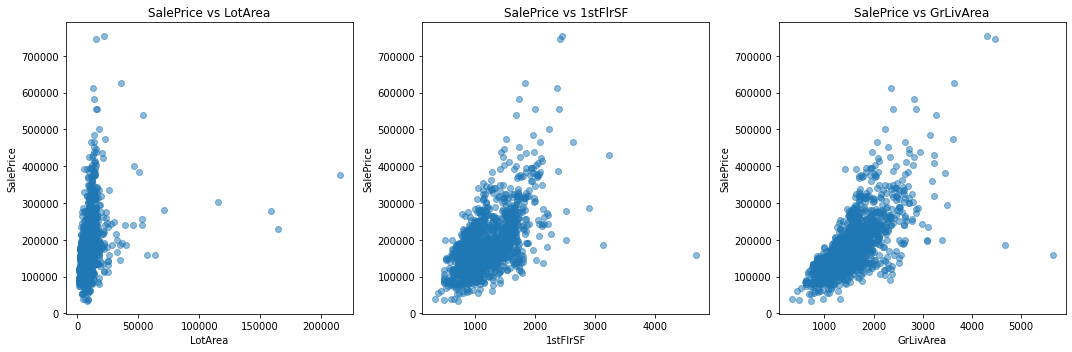

In [4]:
# Your code here - import relevant library, create scatter plots
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "ames.csv" 
ames = pd.read_csv(file_path, index_col=0)

# Select relevant features
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()

# Create scatter plots for each feature against SalePrice
features = ['LotArea', '1stFlrSF', 'GrLivArea']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, feature in zip(axes, features):
    ax.scatter(ames_subset[feature], ames_subset['SalePrice'], alpha=0.5)
    ax.set_xlabel(feature)
    ax.set_ylabel('SalePrice')
    ax.set_title(f'SalePrice vs {feature}')

plt.tight_layout()
plt.show()


# Your written answer here - do these seem like good candidates for linear regression?

1stFlrSF and GrLivArea appear to be good predictors thus a good candidate for linear regression unlike LotArea


## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [5]:
# Your code here - define y and baseline X
# Define the dependent variable (target)
y = ames_subset['SalePrice']

# Define the baseline independent variable (feature)
X = ames_subset[['GrLivArea']]  # Using GrLivArea as the predictor


In [6]:
# Your code here - import StatsModels, fit baseline model, display results

# Import necessary libraries
import statsmodels.api as sm
# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the linear regression model using StatsModels
model = sm.OLS(y, X).fit()

# Display model summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          4.52e-223
Time:                        09:54:07   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

# Your written answer here - interpret model results
R-squared = 0.502: The model explains 50.2% of the variation in house prices.

GrLivArea Coefficient = 107.13: Each additional square foot of above-grade living area increases house prices by approximately $107.13.

Intercept = 18,570: The theoretical price of a house with zero living area.

p-value < 0.05: The predictor GrLivArea is statistically significant.

Possible Improvements: Adding more predictors (e.g., LotArea, 1stFlrSF) could enhance the model’s predictive power.

## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [7]:
# Your code here - define X
# Import necessary libraries
import statsmodels.api as sm

# Define the dependent variable (target)
y = ames_subset['SalePrice']

# Define independent variables (all features in the subset)
X = ames_subset[['LotArea', '1stFlrSF', 'GrLivArea']]

# Add a constant (intercept) to the model
X = sm.add_constant(X)


In [8]:
# Your code here - fit model and display results
# Fit the multiple linear regression model using StatsModels
multiple_model = sm.OLS(y, X).fit()

# Display model summary
print(multiple_model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.57e-262
Time:                        09:54:07   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.0

# Your written answer here - interpret model results. Does this model seem better than the previous one?

R-squared = 0.565: The model explains 56.5% of the variation in house prices, an improvement over the simple linear model.

GrLivArea Coefficient = 80.61: Each additional square foot of above-grade living area increases house prices by $80.61.

1stFlrSF Coefficient = 60.29: Each additional square foot of first-floor space increases house prices by $60.29.

LotArea Coefficient = 0.284: Lot size has a small effect and is not very significant (p-value ≈ 0.051).

Intercept = -14,310: Indicates that the model does not perfectly extrapolate for very small houses.

Adjusted R-squared increased from 0.502 to 0.564, showing that this model is better than the previous one.


## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

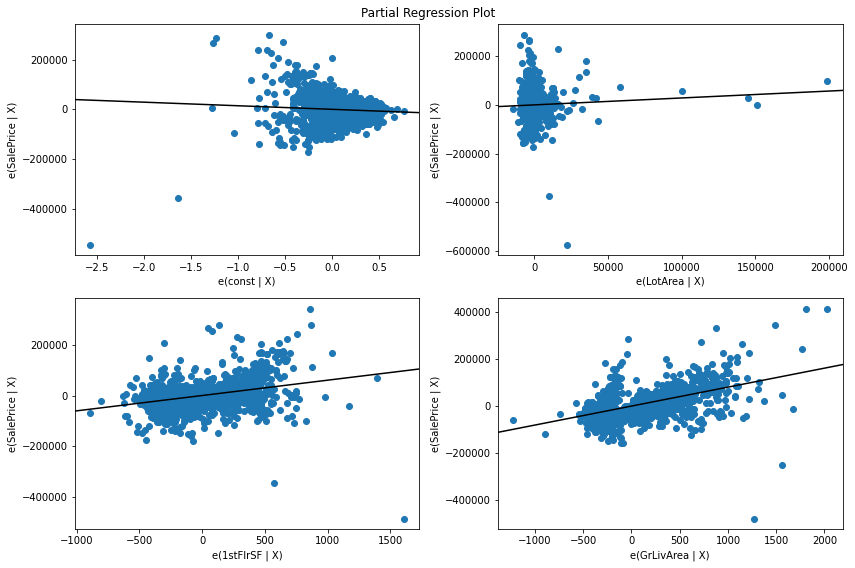

In [9]:
# Your code here - create partial regression plots for each predictor

# Import necessary library
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate partial regression plots for each predictor
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(multiple_model, fig=fig)
plt.show()


# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?

GrLivArea vs. SalePrice: Shows a strong positive linear relationship, confirming its importance in predicting SalePrice.

1stFlrSF vs. SalePrice: Also has a clear positive relationship, meaning more first-floor space increases home prices.

LotArea vs. SalePrice: Shows a weaker trend, suggesting LotArea is not a strong predictor.

These plots confirm what we observed in Step 1—that GrLivArea and 1stFlrSF are stronger predictors than LotArea.

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [10]:
# Your code here - import linear regression from scikit-learn and create and fit model
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define the dependent variable (target) and independent variables
y = ames_subset['SalePrice']
X = ames_subset[['LotArea', '1stFlrSF', 'GrLivArea']]

# Initialize and fit the linear regression model using scikit-learn
sklearn_model = LinearRegression()
sklearn_model.fit(X, y)

# Get model predictions
y_pred = sklearn_model.predict(X)




In [11]:
# Your code here - compare R-Squared

# Compare R-Squared values
r2_sklearn = r2_score(y, y_pred)
r2_statsmodels = multiple_model.rsquared



In [12]:
# Your code here - compare intercept and coefficients

intercept_sklearn = sklearn_model.intercept_
coefficients_sklearn = sklearn_model.coef_
intercept_statsmodels = multiple_model.params[0]
coefficients_statsmodels = multiple_model.params[1:].values

# Prepare comparison results
comparison_df = pd.DataFrame({
    "Metric": ["R-Squared", "Intercept", "LotArea Coef", "1stFlrSF Coef", "GrLivArea Coef"],
    "StatsModels": [r2_statsmodels, intercept_statsmodels] + list(coefficients_statsmodels),
    "Scikit-Learn": [r2_sklearn, intercept_sklearn] + list(coefficients_sklearn)
})

# Display comparison results
print(comparison_df)

           Metric   StatsModels  Scikit-Learn
0       R-Squared      0.564980      0.564980
1       Intercept -14313.408857 -14313.408857
2    LotArea Coef      0.284134      0.284134
3   1stFlrSF Coef     60.286646     60.286646
4  GrLivArea Coef     80.606058     80.606058


## Interpretation of Scikit-Learn vs. StatsModels Comparison:
R-Squared Values are Identical (0.565) → Both implementations produce the same model fit.

Intercept and Coefficients Match Exactly → LotArea, 1stFlrSF, and GrLivArea have the same impact on SalePrice in both models.

This confirms that both Scikit-Learn and StatsModels produce the same results for this multiple linear regression model.

## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.